In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("RRab_input.dat","r") as file:
    data=file.readlines()
    data=[row.split() for row in data]
    data=np.array(data)

In [3]:
name=data[:,0].tolist()
all_period=data[:,1]

In [4]:
import os 


path =r"C:/Users/dell//Documents/MP III/phot/"
os.chdir(path)
files_no_ext = [".".join(f.split("_")[:-1]) for f in os.listdir() if os.path.isfile(f)]
#print(files_no_ext)
names=[]
for i in range(0,len(files_no_ext),2):
    names.append(files_no_ext[i])

In [5]:
period=[]
for i in range(0,len(names)):
    index = name.index(names[i])
    period.append(float(all_period[index]))

In [6]:
X=np.empty(shape=(200,2))
for i in range(0,200):
    X[i][0]=m.log(period[i])
    X[i][1]=1

In [7]:
# Import the required libraries
import os

# Define the location of the directory
path =r"C:/Users/dell//Documents/MP III/phot/"

# Change the directory
os.chdir(path)

def read_files(file_path,B):
    with open(file_path, 'r') as file:
        data=file.readlines()
        data=[row.split() for row in data]
        data=np.array(data,dtype=float)
        A=data[:,1]
        e=data[:,2]
        #np.append(B,float(max(A)))
    return A,e

In [8]:
# Iterate over all the files in the directory
max_magnitude=[]
error_list=[]
for file in os.listdir():
    if file.endswith('rephase.dat'):
      # Create the filepath of particular file
        file_path =f"{path}/{file}"
        A,e=read_files(file_path,max_magnitude)
        A_l=A.tolist()     ## List of magnitude of one star corresponding to different phases
        s=max(A_l)
        index=A_l.index(s)
        max_magnitude.append(float(s))
        error_list.append(float(e[index]))

In [9]:
Y=np.empty(shape=(200,1))
error=np.empty(shape=(200,200))
for i in range(0,200):
    Y[i][0]=max_magnitude[i]
for i in range(0,200):
    error[i][i]=error_list[i]

In [10]:
## A is matrix of x values
## Y is matrix of y values
## C is error matrix
## matrix X gives values of parameters
def weighted(A,B,C):
    c_in=np.linalg.inv(C)
    a_trans=A.transpose()
    d=np.dot(a_trans,c_in)
    e=np.dot(d,A)
    e_in=np.linalg.inv(e)
    f=np.dot(e_in,a_trans)
    g=np.dot(f,c_in)
    h=np.dot(g,B)
    return h

In [11]:
constants=weighted(X,Y,error)
print(constants)

[[-1.32381923]
 [18.41879899]]


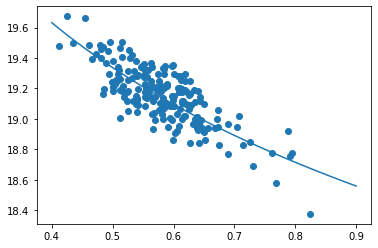

In [15]:
plt.scatter(period,max_magnitude)
x_l=np.linspace(0.4,0.9,100)
y_l=constants[0][0]*(np.log(x_l))+constants[1][0]
plt.plot(x_l,y_l)

# Minimum Magnitude

In [13]:
# Iterate over all the files in the directory
max_magnitude=[]
error_list=[]
for file in os.listdir():
    if file.endswith('rephase.dat'):
      # Create the filepath of particular file
        file_path =f"{path}/{file}"
        A,e=read_files(file_path,max_magnitude)
        A_l=A.tolist()
        s=min(A_l)
        index=A_l.index(s)
        max_magnitude.append(float(s))
        error_list.append(float(e[index]))

In [14]:
Y=np.empty(shape=(200,1))
error=np.empty(shape=(200,200))
for i in range(0,200):
    Y[i][0]=max_magnitude[i]
for i in range(0,200):
    error[i][i]=error_list[i]

In [15]:
constants=weighted(X,Y,error)
print(constants)

[[nan]
 [nan]]


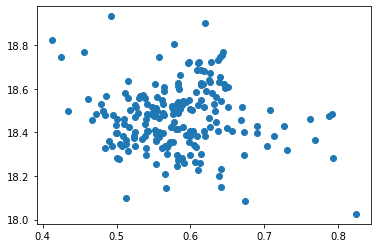

In [16]:
plt.scatter(period,max_magnitude)